# Portrait plot using PMP 

- Generate a static image of Portrait plot (with or without triangles) using the PMP function based on Matplotlib.
- Author: Jiwoo Lee (2021.07)
- Last update: 2024.11

## 1. Input (Dummy Array)

Input data is expected as a set a (stacked or list of) 2-d numpy array(s) with list of strings for x and y axes labels. 

In [1]:
import numpy as np

# Test dummy array -- fill random numbers for each array
data1 = np.random.randn(8, 7)
data2 = np.random.randn(8, 7)
data3 = np.random.randn(8, 7)
data4 = np.random.randn(8, 7)

"""
# Test dummy array -- fill same numbers for each array
data1 = np.full((8, 7), -2)
data2 = np.full((8, 7), -1)
data3 = np.full((8, 7), 1)
data4 = np.full((8, 7), 2)
"""

data_all = np.stack([data1, data2, data3, data4])
xaxis_labels = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7']
yaxis_labels = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8']

xaxis_labels = ['Metric '+x for x in xaxis_labels]
yaxis_labels = ['Model '+y for y in yaxis_labels]

## 2. Matplotlib-based PMP Visualization Function

In [2]:
from pcmdi_metrics.graphics import portrait_plot

<p id="parameters"></p>

Parameters
----------
- `data`: 2d numpy array, a list of 2d numpy arrays, or a 3d numpy array (i.e. stacked 2d numpy arrays)
- `xaxis_labels`: list of strings, labels for xaixs. Number of list element must consistent to x-axis,
                or 0 (empty list) to turn off xaxis tick labels
- `yaxis_labels`: list of strings, labels for yaxis. Number of list element must consistent to y-axis,
                or 0 (empty list) to turn off yaxis tick labels
- `fig`: `matplotlib.figure` instance to which the portrait plot is plotted.
        If not provided, use current axes or create a new one.  Optional.
- `ax`: `matplotlib.axes.Axes` instance to which the portrait plot is plotted.
        If not provided, use current axes or create a new one.  Optional.
- `annotate`: bool, default=False, add annotating text if true,
                but work only for heatmap style map (i.e., no triangles)
- `annotate_data`: 2d numpy array, default=None. If None, the image's data is used.  Optional.
- `annotate_textcolors`: Tuple. A pair of colors for annotation text. Default is ("black", "white")
- `annotate_textcolors_threshold`: Tuple or float. Value in data units according to which the colors from textcolors are applied. Default=(-2, 2)
- `annotate_fontsize`: number (int/float), default=15. Font size for annotation
- `annotate_format`: format for annotate value, default="{x:.2f}"
- `figsize`: tuple of two numbers (width, height), default=(12, 10), figure size in inches
- `vrange`: tuple of two numbers, range of value for colorbar.  Optional.
- `xaxis_fontsize`: number, default=15, font size for xaxis tick labels.  Optional.
- `yaxis_fontsize`: number, default=15, font size for yaxis tick labels.  Optional.
- `xaxis_tick_labels_top_and_bottom`: bool, default=False, if true duplicate xaxis tick label to the other side.  Optional.
- `xticklabel_rotation`: int or float, default=45, degree of angle to rotate x-axis tick label.  Optional
- `inner_line_color`: string, default="k" (black), color for inner lines (triangle edge lines).  Optional.
- `inner_line_width`: float, default=0.5, line width for inner lines (triangle edge lines).  Optional.
- `cmap`: string, default="RdBu_r", name of matplotlib colormap.  Optional.
- `cmap_bounds`: list of numbers.  If given, discrete colors are applied.  Optional.
- `cbar_label`: string, default=None, label for colorbar.  Optional.
- `cbar_label_fontsize`: number, default=15, font size for colorbar labels.  Optional.
- `cbar_tick_fontsize`: number, default=12, font size for colorbar tick labels.  Optional.
- `cbar_kw`: A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
- `colorbar_off`: Trun off colorbar if True.  Optional.
- `missing_color`: color, default="grey", `matplotlib.axes.Axes.set_facecolor` parameter.  Optional.
- `invert_yaxis`: bool, default=True, place y=0 at top on the plot.  Optional.
- `box_as_square`: bool, default=False, make each box as square.  Optional.
- `legend_on`: bool, default=False, show legend (only for 2 or 4 triangles portrait plot).  Optional.
- `legend_labels`: list of strings, legend labels for triangls.  Optional.
- `legend_box_xy`: tuple of numbers, position of legend box's upper-left corner.  Optional.
                (lower-left if `invert_yaxis=False`), in `axes` coordinate.  Optional.
- `legend_box_size`: number, size of legend box.  Optional.
- `legend_lw`: number, line width of legend, default=1.  Optional.
- `legend_fontsize`: number, font size for legend, default=14.  Optional.
- `logo_rect`: sequence of float. The dimensions [left, bottom, width, height] of the the PMP logo.  Optional.
                All quantities are in fractions of figure width and height.  Optional
- `logo_off`: bool, default=False, turn off PMP logo.  Optional.
- `debug`: bool, default=False, if true print more message when running that help debugging.  Optional.

Return
------
- `fig`: matplotlib component for figure
- `ax`: matplotlib component for axis
- `cbar`: matplotlib component for colorbar (not returned if colorbar_off=True)

## 3. Usage example

## 3.1 Portrait Plot with 4 Triangles

- data order is clockwise from top: top, right, bottom, left

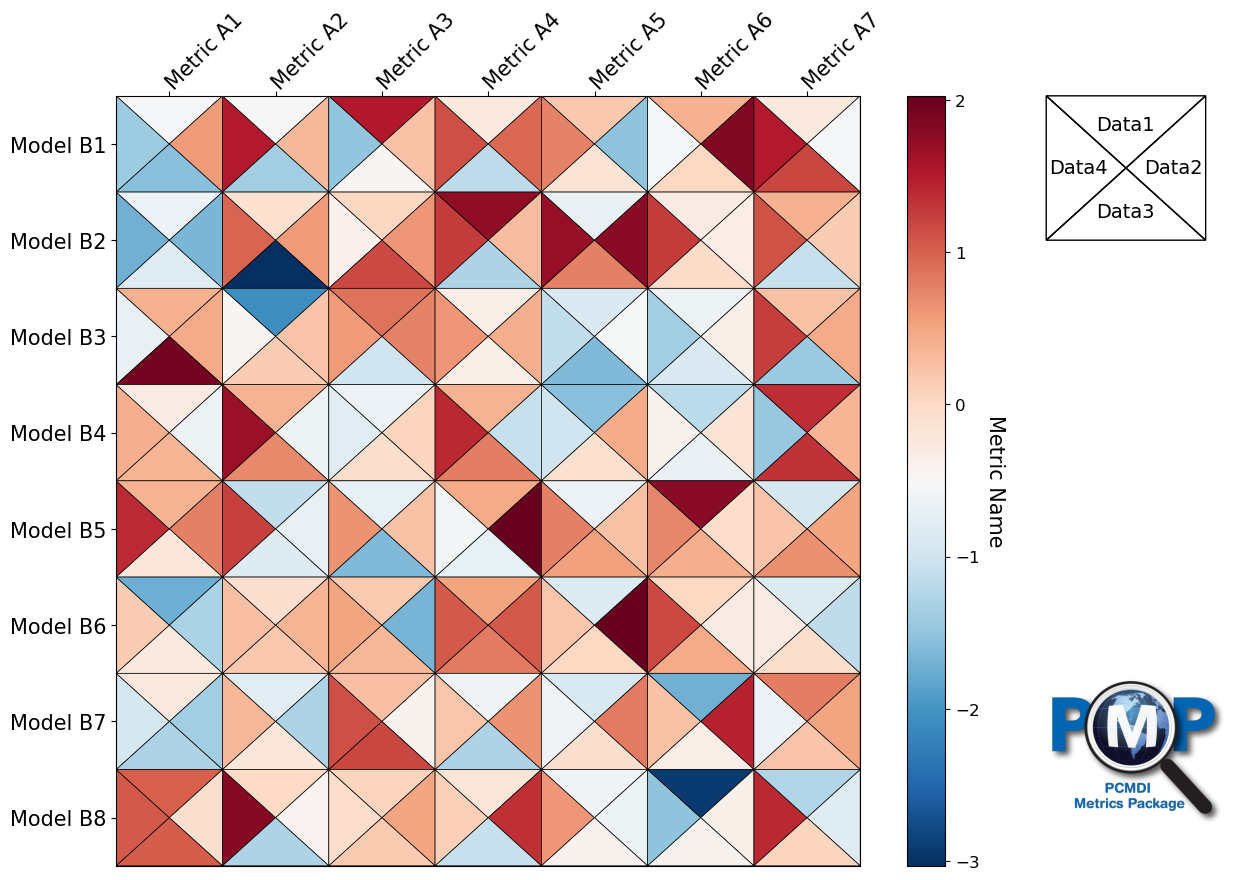

In [3]:
fig, ax, cbar = portrait_plot(data_all,  # or [data1, data2, data3, data4] (top, right, bottom, left: clockwise from top)
                              xaxis_labels=xaxis_labels, 
                              yaxis_labels=yaxis_labels, 
                              cbar_label='Metric Name',
                              legend_on=True,
                              legend_labels=['Data1', 'Data2', 'Data3', 'Data4']
                             )

### Use discrete color levels
- Use `cmap_bounds` and `cbar_kw={"extend": "both"}`

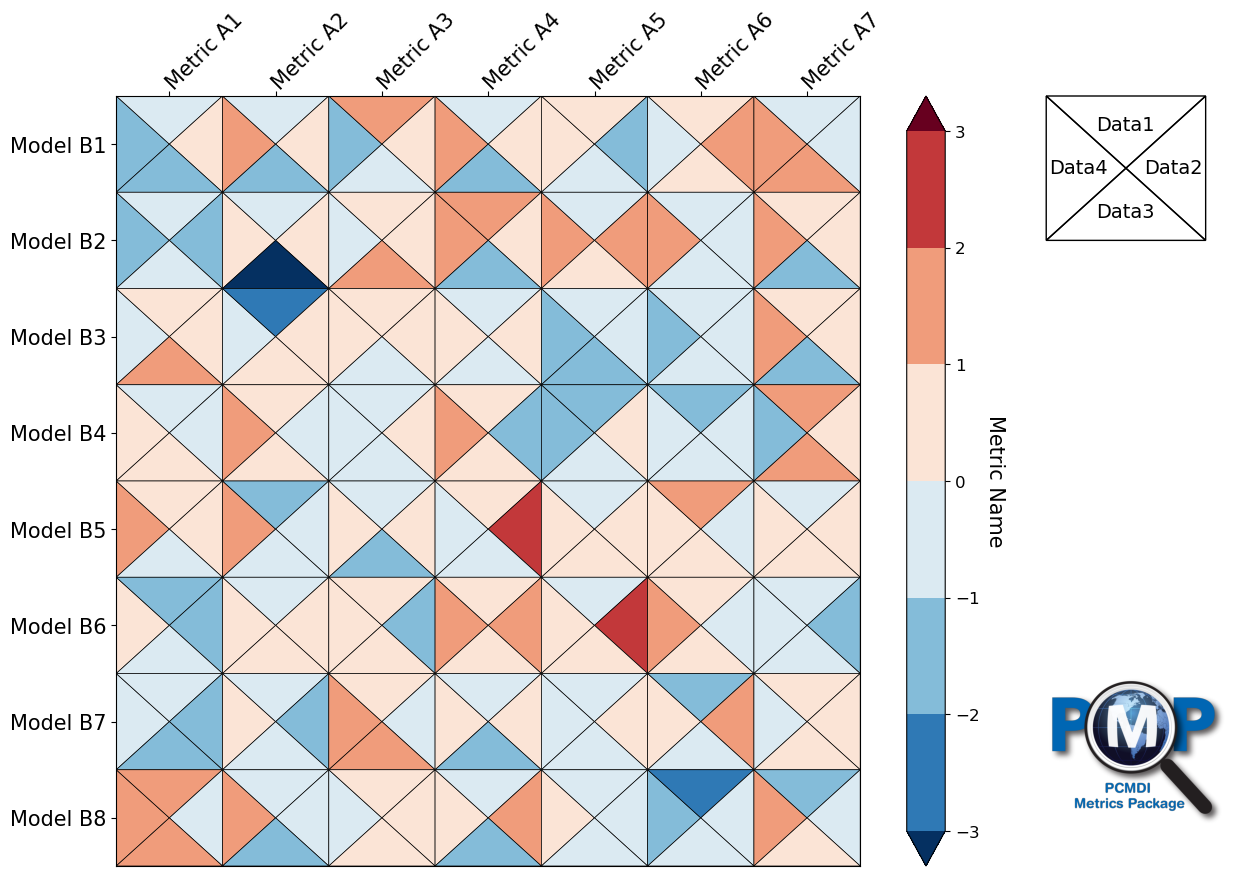

In [4]:
fig, ax, cbar = portrait_plot(data_all,  # or [data1, data2, data3, data4] (top, right, bottom, left: clockwise from top)
                              xaxis_labels=xaxis_labels, 
                              yaxis_labels=yaxis_labels, 
                              cbar_label='Metric Name',
                              legend_on=True,
                              legend_labels=['Data1', 'Data2', 'Data3', 'Data4'],
                              cmap_bounds=[-3, -2, -1, 0, 1, 2, 3],
                              cbar_kw={"extend": "both"}
                             )

## 3.2 Portrait Plot with 2 Triangles

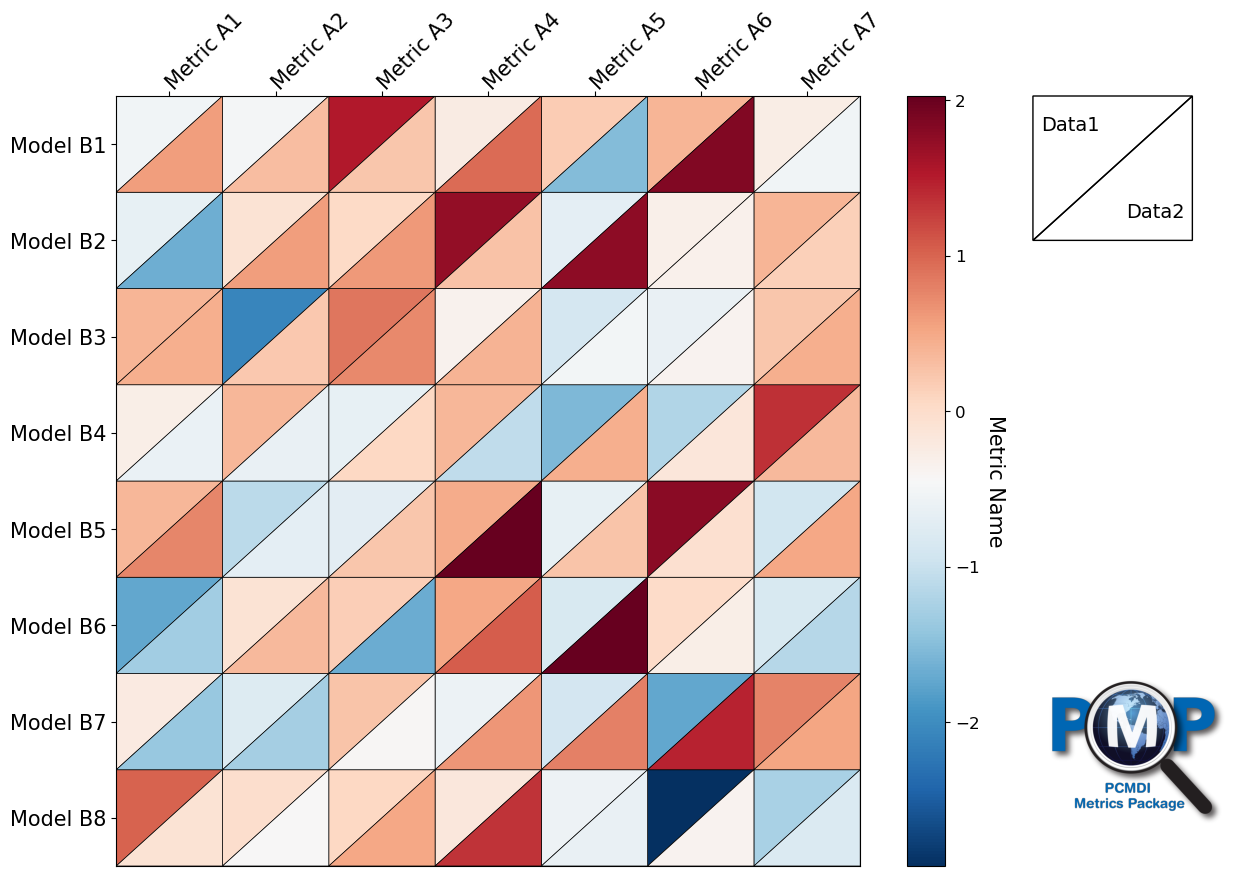

In [5]:
fig, ax, cbar = portrait_plot([data1, data2],  # or np.stack([data1, data2]) for (upper, lower)
                              xaxis_labels=xaxis_labels, 
                              yaxis_labels=yaxis_labels, 
                              cbar_label='Metric Name',
                              legend_on=True,
                              legend_labels=['Data1', 'Data2'])

## 3.3 Portrait Plot without Triangles (Heatmap-style)

(<Figure size 1200x1000 with 3 Axes>,
 <Axes: >,
 <matplotlib.colorbar.Colorbar at 0x15fe77bb0>)

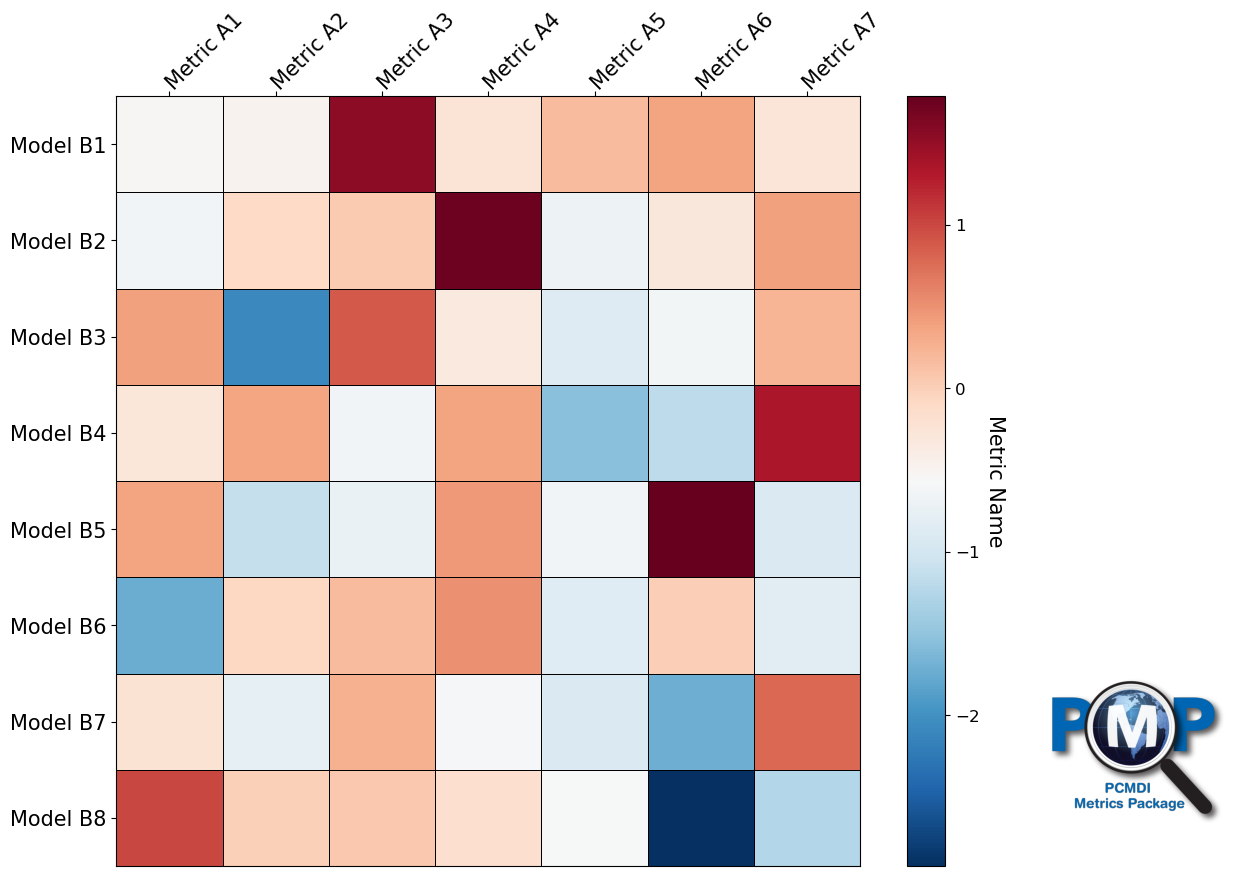

In [6]:
portrait_plot(data1, # or [data1]
              xaxis_labels=xaxis_labels, 
              yaxis_labels=yaxis_labels, 
              cbar_label='Metric Name')

### 3.3.2 Annotated Heatmap

Showing numbers in each box is only avaiable with the heatmap-style (no triangle) portrait plot. By default, in each box value corresponding to color is shown.

(<Figure size 1200x1000 with 3 Axes>,
 <Axes: >,
 <matplotlib.colorbar.Colorbar at 0x16001b1f0>)

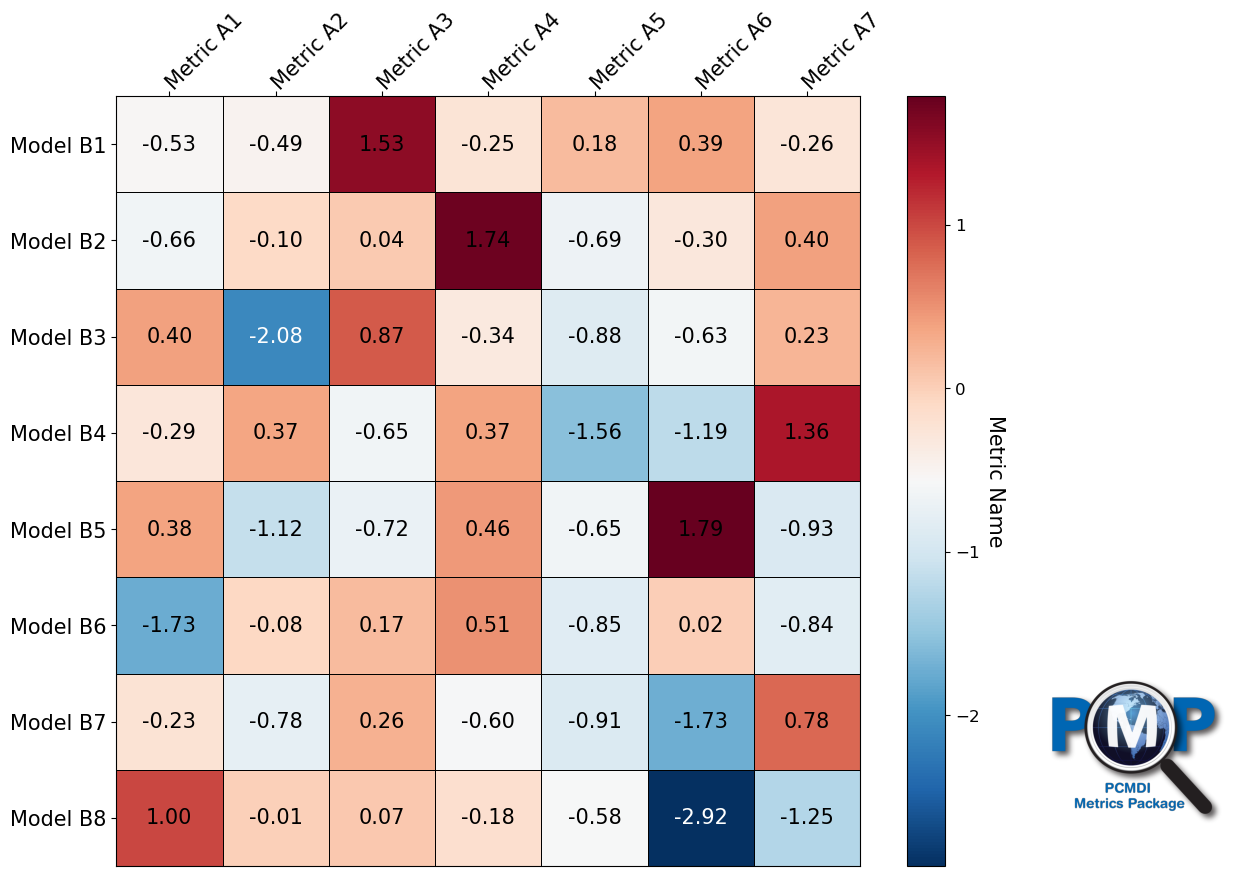

In [7]:
portrait_plot(data1, 
              xaxis_labels=xaxis_labels, 
              yaxis_labels=yaxis_labels, 
              annotate=True, 
              cbar_label='Metric Name')

### 3.3.3 Annotated Heatmap (use alternative numbers)

If you want to use different number than colored (e.g., usually portrait plot uses normalized numbers per metric for colors but you want to show actual metric value that is not normalized), you can assign another array as `annotate_data`. Note that the 2d array given as the `annotate_data` should have the same size as the given 2d array for plotting.

(<Figure size 1200x1000 with 3 Axes>,
 <Axes: >,
 <matplotlib.colorbar.Colorbar at 0x16019a2f0>)

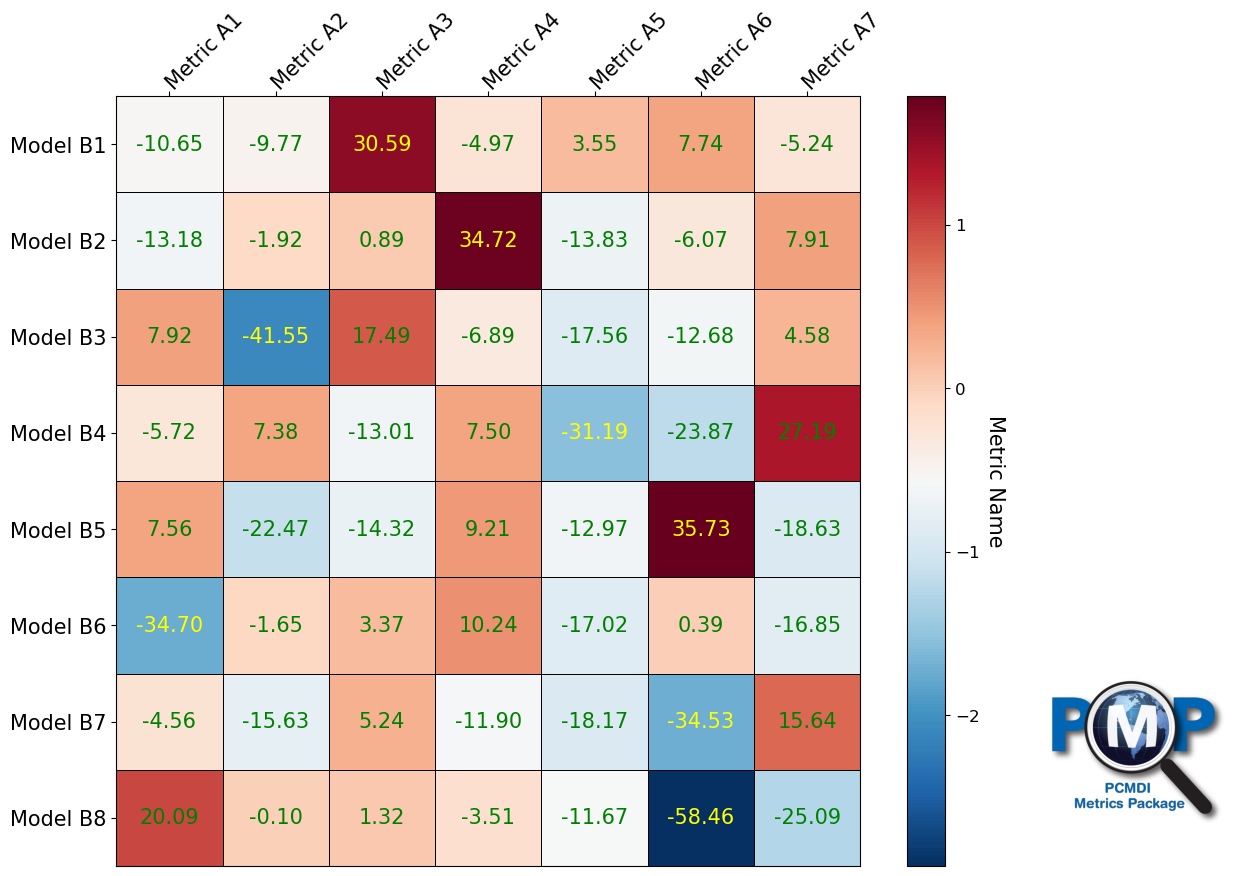

In [8]:
annotate_data = data1 * 20

portrait_plot(data1,
              annotate_data = annotate_data,
              xaxis_labels=xaxis_labels, 
              yaxis_labels=yaxis_labels, 
              annotate_textcolors=("green", "yellow"),
              annotate_textcolors_threshold=(-1.5, 1.5),
              annotate=True, 
              cbar_label='Metric Name')

### 3.3.4 Further customizations

- Use <a href="#parameters">input parameters</a> of `portrait_plot` function for customizing the plot. 
- In addition, by returning [`fig`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html) (figure), [`ax`](https://matplotlib.org/stable/api/axes_api.html) (axis), and [`cbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html) (colorbar), which are [`matplotlib`](https://matplotlib.org/) components, enables further plot customizations.

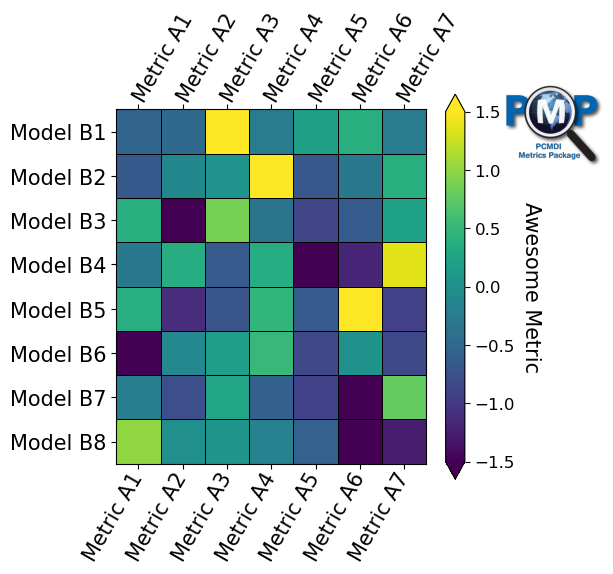

In [9]:
fig, ax, cbar = portrait_plot(data1, 
                              xaxis_labels=xaxis_labels, 
                              yaxis_labels=yaxis_labels, 
                              xaxis_tick_labels_top_and_bottom=True,
                              xticklabel_rotation=60,
                              cbar_label='Awesome Metric',
                              figsize=(5, 5), 
                              vrange=(-1.5, 1.5),
                              cmap="viridis",
                              box_as_square=True,
                              cbar_kw={"extend": "both"},
                              logo_rect = [0.9, 0.7, 0.2, 0.2]
                             )

- Further customizations are avaialble by using returned [`fig`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html) (figure), [`ax`](https://matplotlib.org/stable/api/axes_api.html) (axis), and [`cbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html) (colorbar), which are [`matplotlib`](https://matplotlib.org/) components.

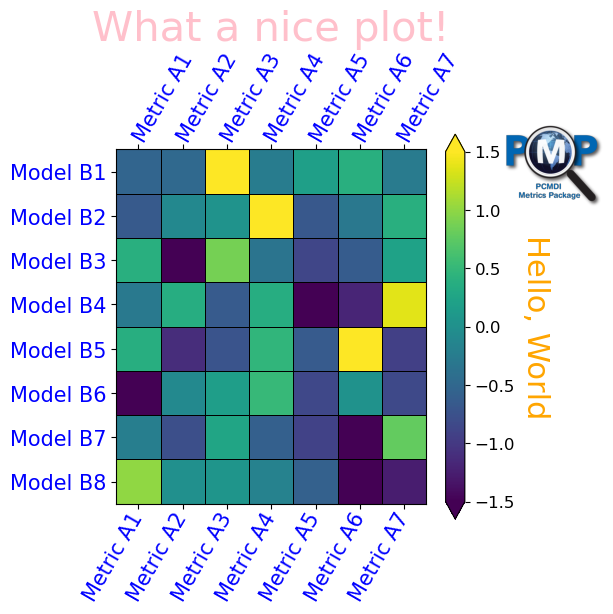

In [10]:
ax.set_title('What a nice plot!', fontsize=30, color="pink")
ax.tick_params(labelcolor='blue')
cbar.ax.set_ylabel("Hello, World", rotation=-90, ha="center", fontsize=22, color="orange")
fig

### 3.3.5 Multi-panel plot

- You can make also a multi-panel plot.

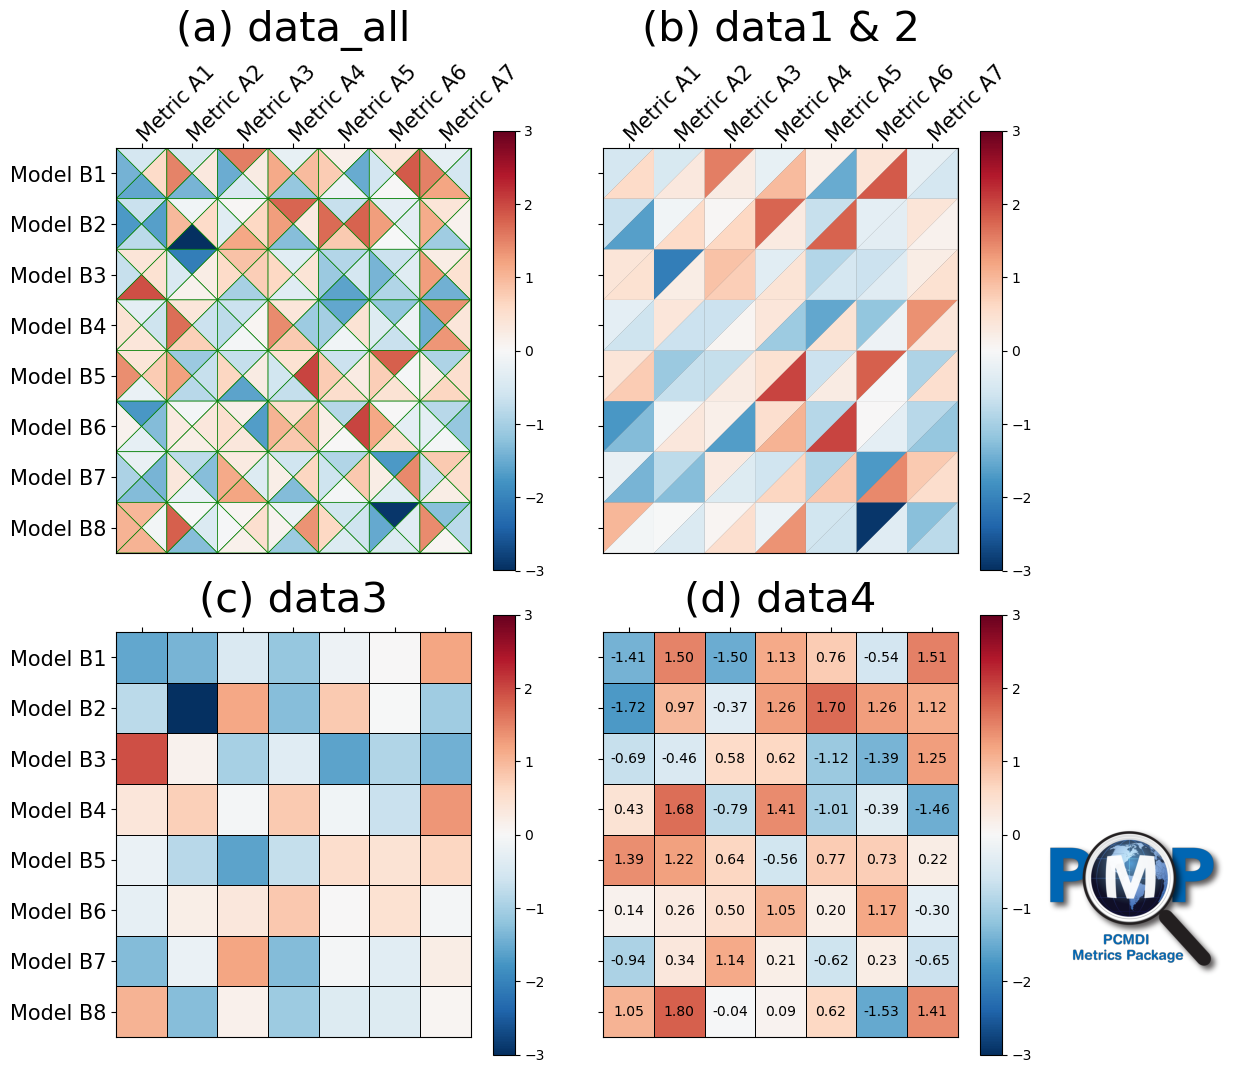

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

portrait_plot([data1, data2, data3, data4], 
              fig=fig, ax=ax[0,0],
              xaxis_labels=xaxis_labels, 
              yaxis_labels=yaxis_labels, 
              inner_line_color="green",
              vrange=(-3, 3), box_as_square=True, logo_off=True)
ax[0,0].set_title('(a) data_all', fontsize=30, pad=15)

portrait_plot([data1, data2], 
              fig=fig, ax=ax[0,1],
              xaxis_labels=xaxis_labels, 
              yaxis_labels=[], 
              inner_line_width=0,
              vrange=(-3, 3), box_as_square=True, logo_off=True)
ax[0,1].set_title('(b) data1 & 2', fontsize=30, pad=15)

portrait_plot(data3, 
              fig=fig, ax=ax[1,0],
              xaxis_labels=[], 
              yaxis_labels=yaxis_labels, 
              vrange=(-3, 3), box_as_square=True, logo_off=True)
ax[1,0].set_title('(c) data3', fontsize=30, pad=15)

portrait_plot(data4,
              annotate=True,
              annotate_fontsize=10,
              fig=fig, ax=ax[1,1],
              xaxis_labels=[], 
              yaxis_labels=[], 
              vrange=(-3, 3), box_as_square=True)
ax[1,1].set_title('(d) data4', fontsize=30, pad=15)

plt.subplots_adjust(wspace=0.1, hspace=0.1)

plt.show()